# <center><u>Payroll Assignment</u> </center>

<center>Now it's assignment time! Let's start by testing the knowledge we have gained so far.</center>

# <center><u>Introduction</u> </center>

This Jupyter notebook is part of your learning experience in the study of applied statistics.

You will work with data sets that contain payroll data of employees of a particular company.

In this exercise, you will perform the following tasks:

1 - Load and study the data.

2 - Clean the data and prepare it for further analysis.

3 - Conduct a hypothesis test for the data using Z-scores.

4 - Conduct a t-test for the data.

# Task 1 - Load and study the data

Load the libraries.

In [1]:
# Load "numpy" and "pandas" for manipulating numbers and data frames
##################### CODE HERE ##########################
import numpy as np
import pandas  as pd

Load the csv file as pandas dataframe. 

In [3]:
# Read in the "Payroll_2015.csv" file as a Pandas Data Frame and store it as "df_2015"
# Note: Make sure the code and the data are in the same folder or specify the appropriate path
##################### CODE HERE ##########################
df_2015 = pd.read_csv(r"E:/DataScience_and_DataAnalyst_Notes/Maths/Dataset/Payroll_2015.csv",index_col=0)

Reference:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

In [4]:
# Take a brief look at the data frame "df_2015" using ".head()"
##################### CODE HERE ##########################
df_2015.head()

,Projected Annual Salary
Row ID,
114364,$38857.68
114365,$38857.68
114366,$35078.40
114367,$35078.40
114368,$35078.40


In [ ]:
# Study the description of the data
# Note: Make sure the code and the data description are in the same folder or specify the appropriate path
with open('/content/Payroll_2015_Feature_Description.txt', 'r') as f:
    print(f.read())

The data has 2 columns and 59678 rows.
The columns are as follows:
1. Row ID : the ids 
2. Projected Annual Salary : the salaries in $s.


Reference:-https://www.w3schools.com/python/pandas/ref_df_info.asp

In [5]:
# Look at basic information about the data frame "df_2015" using ".info()"
##################### CODE HERE ##########################
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59767 entries, 114364 to 174093
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Projected Annual Salary  59767 non-null  object
dtypes: object(1)
memory usage: 933.9+ KB


In [6]:
# Read in the "Payroll_2016_Sample.csv" file as a Pandas Data Frame and store it as "df_2016_sample"
# Note: Make sure the code and the data are in the same folder or specify the appropriate path
##################### CODE HERE ##########################
df_2016_sample=pd.read_csv(r"E:/DataScience_and_DataAnalyst_Notes/Maths/Dataset/Payroll_2016_Sample.csv",index_col=0)

In [7]:
# Take a brief look at the data frame "df_2016_sample" using ".head()"
##################### CODE HERE ##########################
df_2016_sample.head()

,Projected Annual Salary
Row ID,
206226,$80659.44
236669,$37688.40
232394,$80137.44
190682,$99764.64
218049,$57795.84


In [ ]:
# Study the description of the data
# Note: Make sure the code and the data description are in the same folder or specify the appropriate path
with open('/content/Payroll_2016_Sample_Feature_Description.txt', 'r') as f:
    print(f.read())

The data has 2 columns and 59678 rows.
The columns are as follows:
1. Row ID : the ids 
2. Projected Annual Salary : the salaries in $s.


In [8]:
# Look at basic information about the data frame "df_2016_sample" using ".info()"
##################### CODE HERE ##########################
df_2016_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11091 entries, 206226 to 264606
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Projected Annual Salary  11091 non-null  object
dtypes: object(1)
memory usage: 173.3+ KB


Reference:- 
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [9]:
# Load "scipy.stats" for scientific and statistical methods
# Load "statsmodels.stats.weightstats.ztest" for Z-tests
##################### CODE HERE ##########################


Observations:

We are interested in checking whether average annual salaries have increased from 2015 to 2016.

The data from 2015 is used only to arrive at a mean value for the null hypotheses in this exercise.

The data on which the actual hypothesis testing is done is the data from 2016.

Note: The 2016 data set is a sample and not the actual population data for 2016

In [ ]:
###########################################################################

# Task 2 - Clean the data and prepare it for further analysis

Reference:-  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

Change the column name to something much more interpretable.

In [10]:
# Rename the "Projected Annual Salary" feature to "CTC" for both data frames
# Note: Use the ".rename()" method and update the original data frames "df_2015" and "df_2016_sample"
# Note: The old and new column names must be passed to the "columns" parameter as a dictionary
##################### CODE HERE ##########################
df_2015=df_2015.rename(columns={'Projected Annual Salary':'CTC'})
df_2016_sample=df_2016_sample.rename(columns={'Projected Annual Salary':'CTC'})

In [13]:
# Remove the "$" symbol from the "CTC" feature in both data frames using ".str.replace()" method
# Note: Pass the values "$" and "" as two parameters to the ".str.replace()" function for the "CTC" feature of the data frame
# Note: The "regex" parameter must be set to "True"
##################### CODE HERE ##########################
df_2015['CTC']=df_2015['CTC'].str.replace('$',' ',regex=True)
df_2016_sample['CTC']=df_2016_sample['CTC'].str.replace('$',' ',regex=True)

In [15]:
# Convert the "CTC" feature to the "float" data type in both data frames using the ".astype()" method
# Note: Pass the value "float" as a parameter to the ".astype()" function
##################### CODE HERE ##########################
df_2015['CTC']=df_2015['CTC'].astype(float)
df_2016_sample['CTC']=df_2016_sample['CTC'].astype(float)

In [17]:
# Remove any entries in the data frame "df_2015" that contain "CTC" values as 0
# Note: You can update the original data frame "df_2015" to contain "CTC" values greater than 0
##################### CODE HERE ##########################
df_2015=df_2015[df_2015['CTC']>0]

In [ ]:
# Remove any entries in the data frame "df_2016_sample" that contain "CTC" values as 0
# Note: You can update the original data frame "df_2016_sample" to contain "CTC" values greater than 0
##################### CODE HERE ##########################
df_2016_sample=df_2016_sample[df_2015['CTC']>0]

Observation:

A rigorous way to check whether the compensations have increased from 2015 to 2016 or not is by using hypothesis tests.

In [ ]:
###########################################################################

# Task 3 - Conduct a hypothesis test for the data using Z-scores

The null hypothesis is: The annual compensation of employees does not increase from the year 2015 to 2016.

The alternate hypothesis is: The annual compensation of employees increases from the year 2015 to 2016.

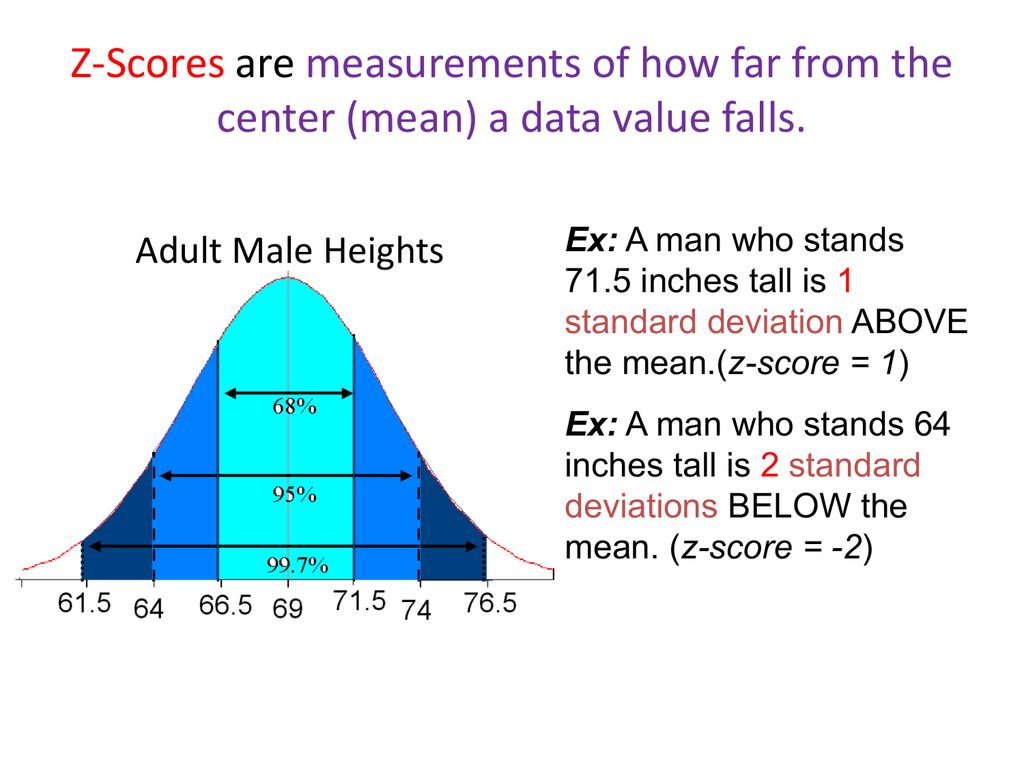

In [ ]:
# Since we do not have the population standard deviation for the 2016 data, we will use the adjusted formula for the Z-score
# The adjusted formula for the Z-score is "z = (X - m) / s"
# "X" is the actual mean of the 2016 sample
# "m" is the mean of the 2016 sample under the null hypothesis, so we can use the mean of the 2015 data in place of "m"
# "s" is either the population standard deviation for 2016 or the adjusted sample standard deviation for 2016
# We do not have the population standard deviation for 2016
# So, we will use the adjusted formula "s = standard deviation of sample / sqrt(number of observations in the sample)"
# Calculate a Z-score for the 2016 sample data using the appropriate formula and store it as "z_score"
##################### CODE HERE ##########################
num=df_2016_sample['CTC'].mean() - df_2015['CTC'].mean()
den=df_2016_sample['CTC'].std()/np.sqrt(len(df_2016_sample))
z_score=num/den

In [ ]:
# Since this is a one-tailed test, the critical Z-score for a confidence level of 95% is about 1.65
# Print the value of "z_score"
##################### CODE HERE ##########################
z_score

6.888610601055715

Reference:- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
# Calculate the p-value associated with the Z-score using "stats.norm.sf(abs(z_score))"
# Note: Store the resulting p-value as "p_value_z"
##################### CODE HERE ##########################
p_value_z=stats.norm.sf(abs(z_score))

In [ ]:
# Print the value of "p_value_z"
##################### CODE HERE ##########################
p_value_z

2.8169961392070023e-12

Please refer to this article. It is useful for thorough study.

Reference:- https://www.statology.org/z-test-python/

A more brief video for the type of tests with some examples.

In [ ]:
# Run a Z-test for the data using the "ztest()" method
# Store the resulting Z-score as "z_stat" and the resulting p-value as "p_val_z"
# Note: The parameter "x1" must be set to "df_2016_sample['CTC']"
# Note: The parameter "x2" must be set to "None" as this is a single sample test
# Note: The parameter "alternative" must be set to "larger" as this is a one-tailed (upper) test
# Note: The parameter "value" must be set to the null hypothesis (2015) mean, that is "df_2015['CTC'].mean()"
##################### CODE HERE ##########################
z_stat,p_value_z=ztest(x1=df_2016_sample['CTC'],x2=None,altenative='larger',value=df_2016_sample['CTC'].mean())

In [ ]:
# Print the value of "z_stat"
##################### CODE HERE ##########################
z_stat

6.888610601059167

In [ ]:
# Print the value of "p_val_z"
##################### CODE HERE ##########################
p_value_z

2.8169961391386618e-12

Observations:

The calculated Z-statistic (about 6.89) is greater than the critical Z-statistic (about 1.65).

The calculated p-value (nearly 0) is less than 0.05.

So, the null hypothesis may be safely rejected.

Thus, the alternate hypothesis that the annual salaries increase from the year 2015 to the year 2016 is true.

In [ ]:
###########################################################################

# Task 4 - Conduct a t-test for the data

The null hypothesis is: The annual compensation of employees does not increase from the year 2015 to 2016.

The alternate hypothesis is: The annual compensation of employees increases from the year 2015 to 2016.

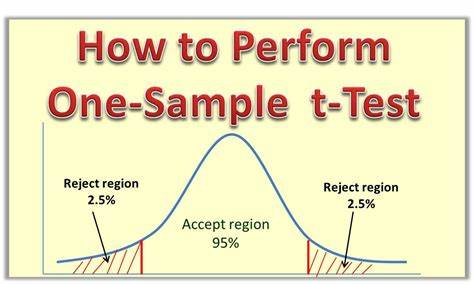

In [ ]:
# The formula for the t-statistic is "t = (X - m) / s"
# "X" is the actual mean of the 2016 sample
# "m" is the mean of the 2016 sample under the null hypothesis, so we can use the mean of the 2015 data in place of "m"
# "s" is the adjusted sample standard deviation for 2016
# The formula for "s" is "s = standard deviation of sample / sqrt(number of observations in the sample)"
# Calculate a t-statistic for the 2016 sample data using the appropriate formula and store it as "t_score"
##################### CODE HERE ##########################
num=df_2016_sample['CTC'].mean() - df_2015['CTC'].mean()
den=df_2016_sample['CTC'].std()/np.sqrt(len(df_2016_sample))
t_score = num/den

In [ ]:
# Since this is a one-tailed test with many degrees of freedom, the critical t-statistic for a confidence level of 95% is about 1.65
# Print the value of "t_score"
##################### CODE HERE ##########################
t_score

6.888610601055715

Reference:- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [ ]:
# Calculate the p-value associated with the t-statistic using "stats.t.sf(abs(t_score), len(df_2016_sample) - 1)"
# Note: Store the resulting p-value as "p_value_t"
##################### CODE HERE ##########################
p_value_t=stats.t.sf(abs(t_score), len(df_2016_sample) - 1)

In [ ]:
# Print the value of "p_value_t"
##################### CODE HERE ##########################
p_value_t

2.9698553115234848e-12

Reference:- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [ ]:
# Run a t-test for the data using the "stats.ttest_1samp()" method
# Store the resulting t-statistic as "t_stat" and the resulting p-value as "p_val_t"
# Note: The parameter "a" must be set to "df_2016_sample['CTC']"
# Note: The parameter "popmean" must be set to the null hypothesis (2015) mean, that is "df_2015['CTC'].mean()"
# Note: The parameter "alternative" must be set to "greater" as this is a one-tailed (upper) test
##################### CODE HERE ##########################
t_stat,p_value_t=ztest(x1=df_2016_sample['CTC'],x2=None,altenative='larger',value=df_2016_sample['CTC'].mean())

In [ ]:
# Print the value of "t_stat"
##################### CODE HERE ##########################
t_stat

6.888610601059167

In [ ]:
# Print the value of "p_val_t"
##################### CODE HERE ##########################
p_value_t

5.93971062290351e-12

Observations:

The t-distribution becomes nearly equivalent to the standard normal distribution for large sample sizes.

The calculated t-statistic (about 6.89) is greater than the critical t-statistic (about 1.65).

The calculated p-value (nearly 0) is less than 0.05.

So, the null hypothesis may be safely rejected.

Thus, the alternate hypothesis that the annual salaries increase from the year 2015 to the year 2016 is true.

In [ ]:
###########################################################################

# <center><u>Conclusion</u> </center>

We can use hypothesis testing methods such the Z-score method and the Student's t-test to verify various hypotheses

In [ ]:
###########################################################################

**FEEDBACK**

We hope you’ve enjoyed this course so far. We’re committed to help you use "Stats and maths for data science" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form https://forms.zohopublic.in/cloudyml/form/CloudyMLStatisticsFeedbackForm/formperma/WV946wnf0sDM_tOlH87RxZR9yMceKWGrtuPOyXzzCRc